In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

### Load lattice

In [3]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')

### Load all matched quadrupoles and sextupoles strengths 

In [4]:
env.vars.load_json('strengths_quads_00_arc_cell.json')
env.vars.load_json('strengths_quads_01_ffccsyl.json')
env.vars.load_json('strengths_quads_02_ffccsxl.json')
env.vars.load_json('strengths_quads_03_ffccsyr.json')
env.vars.load_json('strengths_quads_04_ffccsxr.json')
env.vars.load_json('strengths_quads_05_ffds_lr.json')
env.vars.load_json('strengths_quads_06_straight.json')

env.vars.load_json('strengths_sext_00_arc_cell.json')
env.vars.load_json('strengths_sext_01_straight.json')
env.vars.load_json('strengths_sext_02_final_focus.json')

In [5]:
line = env['fccee_p_ring']

In [6]:
tw=line.twiss4d()
print(f'qx={tw.qx:.3f} qy={tw.qy:.3f}')

qx=198.200 qy=176.300


### Match vertical tune knob

In [7]:
tw0 = line.twiss4d()
opt = line.match_knob(
    run=False,
    method='4d',
    knob_name='dqy',
    knob_value_start=0,
    knob_value_end=5e-3,
    vary=xt.VaryList(['kqd1', 'kqf2', 'kqd3', 'kqf4', 'kqd5', 'kqf6'], step=1e-9),
    targets=xt.TargetSet(qx=tw0.qx, qy=tw0.qy+5e-3)
) 

In [8]:
opt = line.match_knob(
    run=False,
    method='4d',
    knob_name='dqx',
    knob_value_start=0,
    knob_value_end=5e-3,
    vary=xt.VaryList(['kqd1', 'kqf2', 'kqd3', 'kqf4', 'kqd5', 'kqf6'], step=1e-9),
    targets=xt.TargetSet(qx=tw0.qx+5e-3, qy=tw0.qy)
) 
opt.solve()
opt.generate_knob()

                                             
Optimize - start penalty: 0.05                              
Matching: model call n. 17 penalty = 1.7793e-10              
Optimize - end penalty:  1.77931e-10                            
Generated knob:  dqx


In [9]:
tw=line.twiss4d()
print(f'qx={tw.qx:.3f} qy={tw.qy:.3f}')

qx=198.200 qy=176.300


In [10]:
line['dqx'] = 0.03
line['dqx'] = 0.05

In [11]:
tw=line.twiss4d()
print(f'qx={tw.qx:.3f} qy={tw.qy:.3f}')

qx=198.250 qy=176.300


### Momentum acceptance with changed tunes

Tracking:   0%|          | 0/50 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
frac_lost: 0.426, at_turn_mean: 29.9216 <--


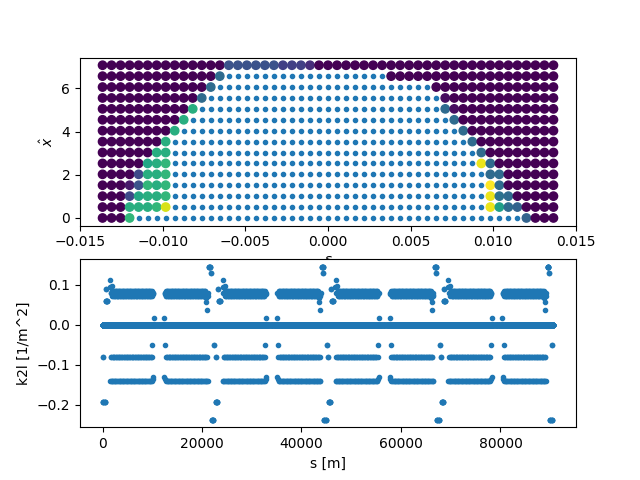

In [12]:
# RF ON!
line['rf_on'] = 1
line['rf_lag'] = 0.5
import sys
from momentum_acceptance import ActionMomentumAcceptance # reusing code from K. Skoufaris
nemitt_x = 6.33e-5
nemitt_y = 1.69e-7
energy_spread=3.9e-4
nn_y_r=15
max_y_r=10
global_xy_limit = 1e-2
num_turns = 50
act = ActionMomentumAcceptance(line,
            nemitt_x, nemitt_y, nn_y_r, max_y_r, energy_spread,
            global_xy_limit=global_xy_limit, num_turns=num_turns)

plt.figure()
_ = act.mom_acceptance(plot=True, with_progress=1)
plt.subplots_adjust(hspace=0.4)